In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import zscore

In [2]:

# Load the Iris dataset
df = sns.load_dataset("iris")

In [12]:


df.isnull().sum().sum()

0

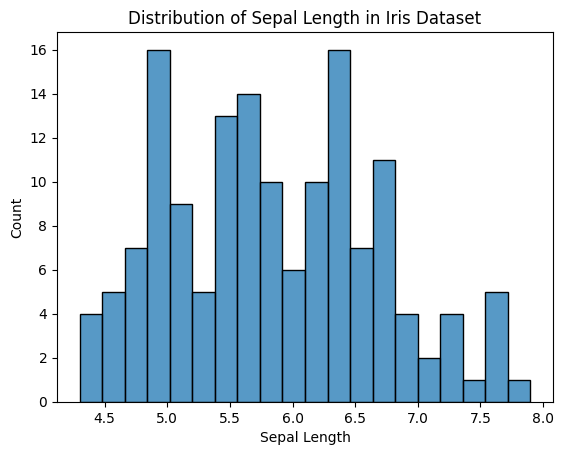

In [13]:
# Create the histogram
sns.histplot(df["sepal_length"], bins=20)

# Add labels and title
plt.xlabel("Sepal Length")
plt.ylabel("Count")
plt.title("Distribution of Sepal Length in Iris Dataset")

# Show the plot
plt.show()

Text(0.5, 1.0, 'Sepal Width Distribution by Species')

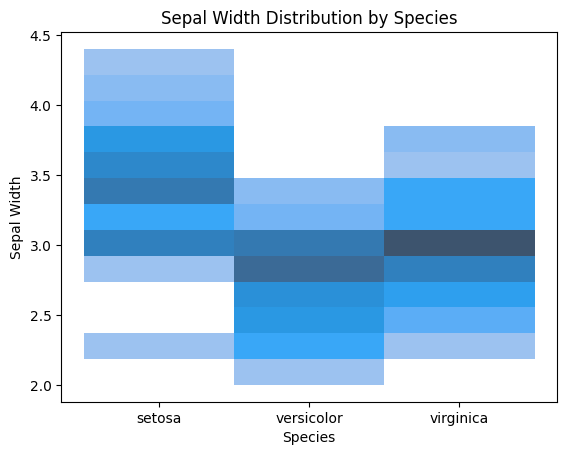

In [38]:
# Group by species and find the average sepal width
sepal_width_by_species = df.groupby("species")["sepal_width"]
sns.histplot(x="species", y="sepal_width", data=df)

# Add labels and title
plt.xlabel("Species")
plt.ylabel("Sepal Width")
plt.title("Sepal Width Distribution by Species")


Text(0.5, 1.0, 'Sepal length Distribution by Species')

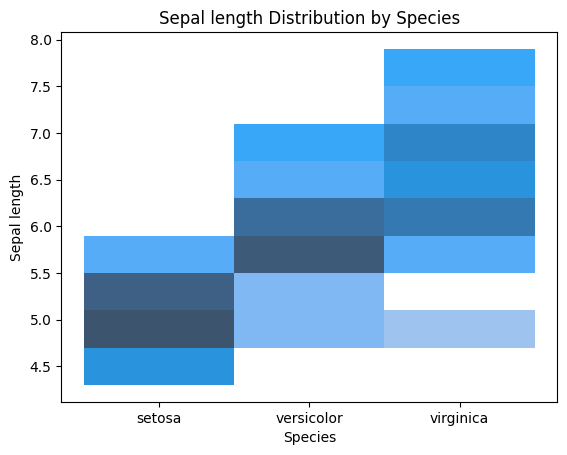

In [45]:
# Group by species and find the average sepal width
sepal_width_by_species = df.groupby("species")["sepal_length"]
sns.histplot(x="species", y="sepal_length", data=df)

# Add labels and title
plt.xlabel("Species")
plt.ylabel("Sepal length")
plt.title("Sepal length Distribution by Species")


# sepal_length    0
# sepal_width     4
# petal_length    0
# petal_width     0

Text(0.5, 1.0, 'petal length Distribution by Species')

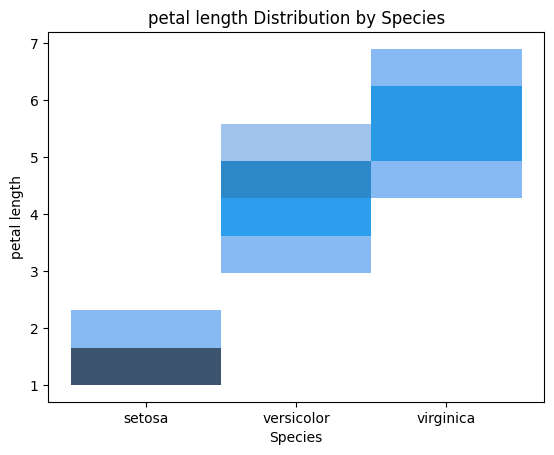

In [44]:
# Group by species and find the average sepal width
sepal_width_by_species = df.groupby("species")["petal_length"]
sns.histplot(x="species", y="petal_length", data=df)

# Add labels and title
plt.xlabel("Species")
plt.ylabel("petal length")
plt.title("petal length Distribution by Species")


# sepal_length    0
# sepal_width     4
# petal_length    0
# petal_width     0

Text(0.5, 1.0, 'petal Width Distribution by Species')

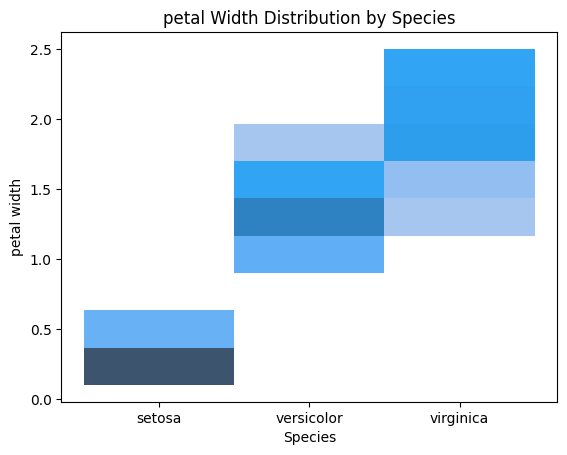

In [43]:
# Group by species and find the average sepal width
sepal_width_by_species = df.groupby("species")["petal_width"]
sns.histplot(x="species", y="petal_width", data=df)

# Add labels and title
plt.xlabel("Species")
plt.ylabel("petal width")
plt.title("petal Width Distribution by Species")


# sepal_length    0
# sepal_width     4
# petal_length    0
# petal_width     0

In [20]:
df.columns


Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

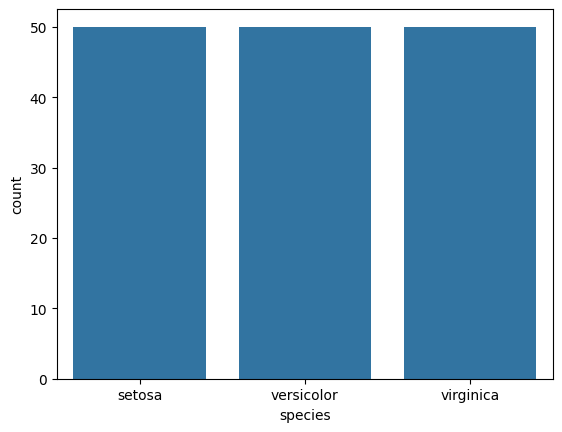

In [21]:
sns.countplot(x='species', data=df)
plt.show()

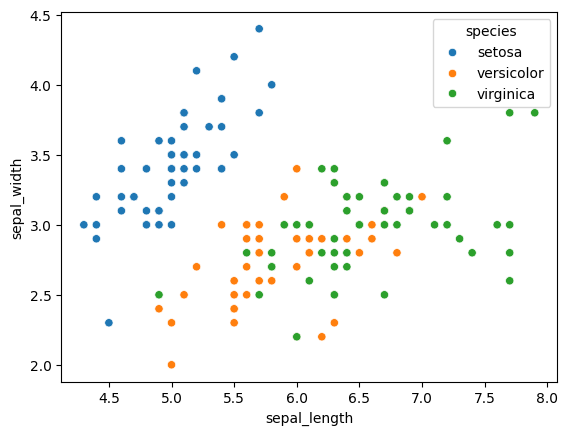

In [22]:
sns.scatterplot(x='sepal_length', y='sepal_width',
                hue='species', data=df )


plt.show()

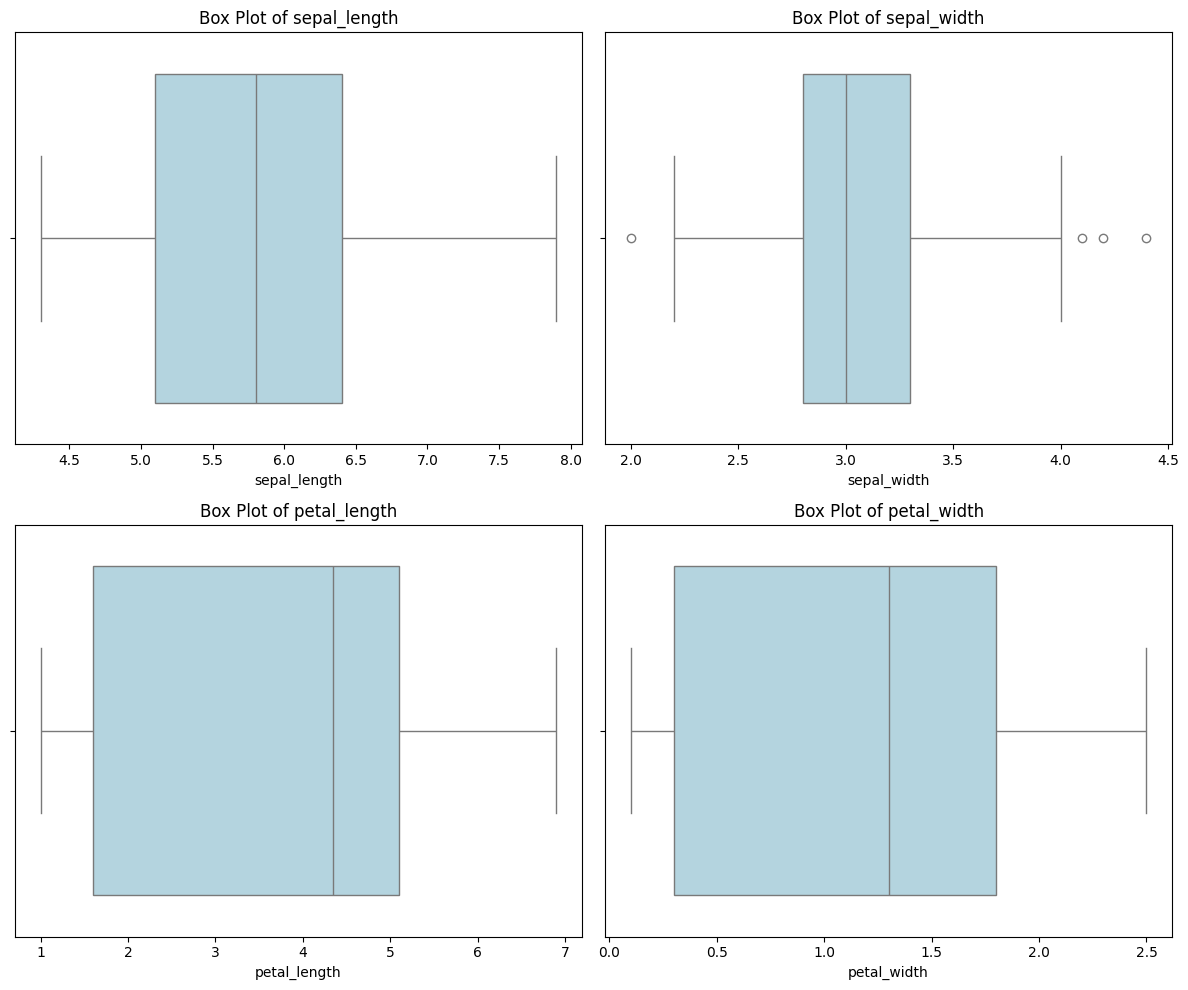

In [23]:
# Assuming 'df' contains the Iris dataset and has an 'id' column
# Exclude the 'id' column and the 'species' column, keeping only the numerical columns
numerical_features = df.drop(columns=['species'])  # Exclude species column
numerical_features = numerical_features.iloc[:, :]  # Ensure only numerical features

# Create 2x2 grid for subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Flatten the axes array for easy indexing
axes = axes.flatten()

# Create a box plot for each numerical feature
for i, feature in enumerate(numerical_features.columns):
    sns.boxplot(x=numerical_features[feature], ax=axes[i], color="lightblue")
    axes[i].set_title(f"Box Plot of {feature}")

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

<Figure size 1200x800 with 0 Axes>

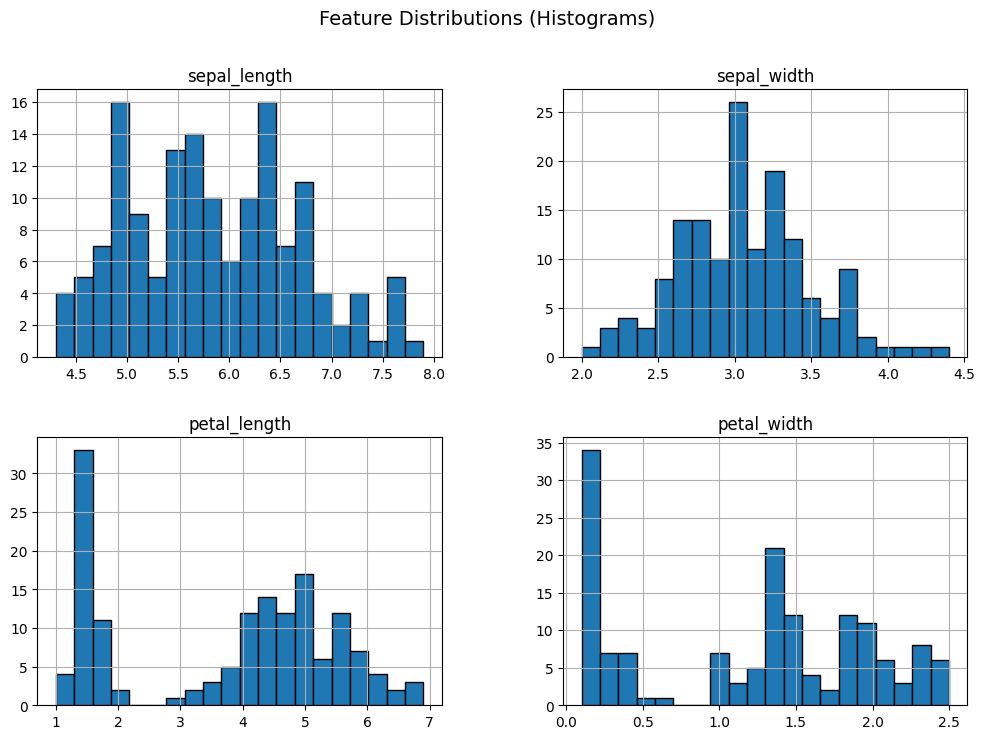

In [25]:
plt.figure(figsize=(12, 8))
df.hist(figsize=(12, 8), bins=20, edgecolor='black')
plt.suptitle("Feature Distributions (Histograms)", fontsize=14)
plt.show()


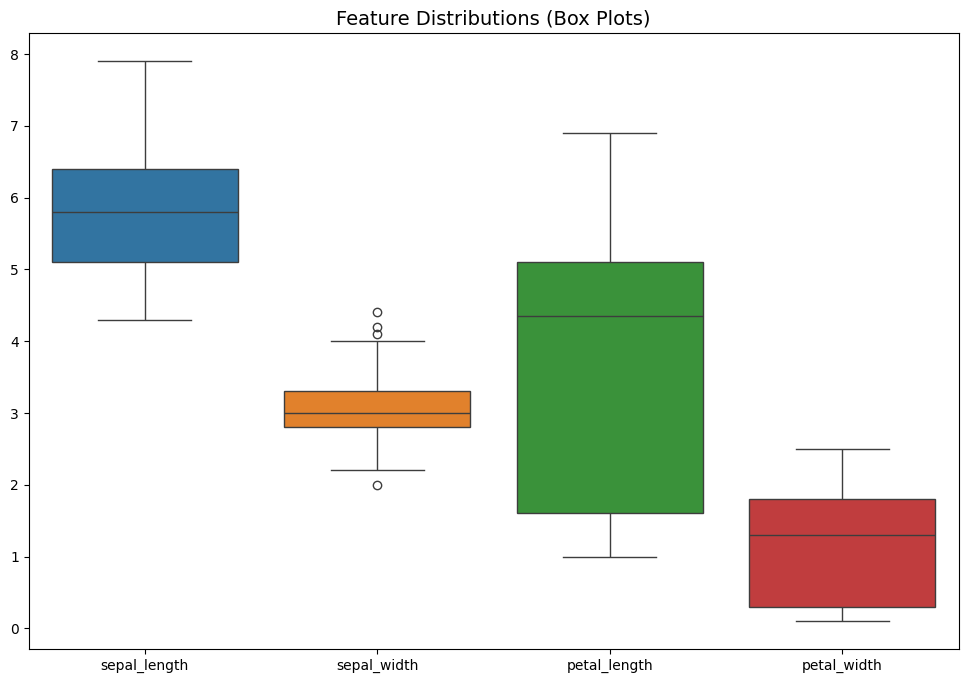

In [27]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df.drop(columns=["species"]))
plt.title("Feature Distributions (Box Plots)", fontsize=14)
plt.show()

In [19]:
# Compute Q1, Q3, and IQR for numeric columns
Q1 = df.drop(columns=["species"]).quantile(0.25)
Q3 = df.drop(columns=["species"]).quantile(0.75)
IQR = Q3 - Q1

# Identify outlier values
outliers = df.drop(columns=["species"])[
    (df.drop(columns=["species"]) < (Q1 - 1.5 * IQR)) |
    (df.drop(columns=["species"]) > (Q3 + 1.5 * IQR))
]

# Print the actual outlier values
print("\nOutlier values per feature:")
print(outliers.dropna(how='all'))  # Drop rows where all values are NaN (i.e., no outliers in that row)


Outlier values per feature:
    sepal_length  sepal_width  petal_length  petal_width  sepal_width_zscore
15           NaN          4.4           NaN          NaN            3.090775
32           NaN          4.1           NaN          NaN            2.400185
33           NaN          4.2           NaN          NaN            2.630382
60           NaN          2.0           NaN          NaN           -2.433947
